In [1]:
from model import mix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mix = mix()

/home/oliver/PhD/malatium/models/model.py:40: RuntimeWarning: invalid value encountered in log
  self.df_rocrit['Prot'] = np.log(self.df_rocrit.Prot)
/home/oliver/PhD/malatium/models/model.py:41: RuntimeWarning: invalid value encountered in log
  self.df_stan['Prot'] = np.log(self.df_stan.Prot)


In [3]:
mix.df_rocrit.columns

Index(['Teff', 'Prot', 'Age', 'Mass', ' Ro'], dtype='object')

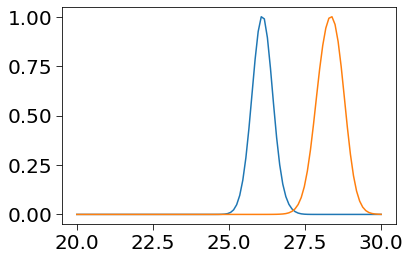

In [4]:
mix.select_down()
mix.make_kde()
mix.plot_kde_example()

In [5]:
dfile = '../data/data_for_guy.csv'
df = pd.read_csv(dfile)

In [6]:
df.head(10)

,Unnamed: 0,KIC,Teff,eTeff,age,loage,upage,modmass,lomodmass,upmodmass,P,l_P,u_P,rhat_flag,eye_flag,source,hrclass,comment
0,0,1435467,6326,77,3.0164,0.3513,0.4951,1.3189,0.0513,0.0304,6.541180,0.620728,0.757775,NaN,0.0,L,SG,NaN
1,1,2837475,6614,77,1.6270,0.1757,0.1118,1.4291,0.0209,0.0190,3.499114,0.154079,0.172064,NaN,0.0,L,SG,NaN
2,2,3427720,6045,77,2.2339,0.2396,0.2396,1.1080,0.0095,0.0209,31.590512,11.821919,10.236450,NaN,0.0,L,MS,NaN
3,3,3456181,6384,77,2.0901,0.1278,0.1278,1.4975,0.0190,0.0304,10.699926,2.790842,2.006340,NaN,0.0,L,SG,Only 80+ACU- confident
4,4,3632418,6193,77,2.6331,0.1757,0.1757,1.4082,0.0209,0.0209,11.205550,0.729588,0.624963,NaN,0.0,L,SG,NaN
5,5,3656476,5668,77,8.3663,1.5651,1.7248,1.0377,0.0399,0.0513,48.040844,12.682362,8.116435,NaN,0.0,L,MS,NaN
6,6,3735871,6107,77,2.3457,0.8464,1.0380,1.0890,0.0399,0.0399,15.810470,2.465683,1.821666,NaN,0.0,L,MS,NaN
7,7,4914923,5805,77,7.5678,1.7886,1.6609,1.0586,0.0494,0.0589,21.393839,3.536735,5.394345,NaN,0.0,L,SG,NaN
8,8,5184732,5846,77,4.8529,0.8784,1.5651,1.1479,0.0589,0.0399,19.907543,1.865728,1.282151,NaN,0.0,L,MS,NaN
9,9,5773345,6130,84,2.5533,0.2396,0.2555,1.4690,0.0304,0.0285,5.928397,0.508977,0.707415,NaN,0.0,L,SG,NaN


In [7]:
df['logage'] = np.log(df.age)
df['uplogage'] = np.log(df.age + df.upage) - df.logage
df['lologage'] = df.logage - np.log(df.age - df.loage)

df['logP'] = np.log(df.P)
df['uplogP'] = np.log(df.P + df.u_P) - df.logP
df['lologP'] = df.logP - np.log(df.P - df.l_P)

In [8]:
df.head(9)

,Unnamed: 0,KIC,Teff,eTeff,age,loage,upage,modmass,lomodmass,upmodmass,...,eye_flag,source,hrclass,comment,logage,uplogage,lologage,logP,uplogP,lologP
0,0,1435467,6326,77,3.0164,0.3513,0.4951,1.3189,0.0513,0.0304,...,0.0,L,SG,NaN,1.104064,0.151979,0.123822,1.878118,0.109614,0.099705
1,1,2837475,6614,77,1.6270,0.1757,0.1118,1.4291,0.0209,0.0190,...,0.0,L,SG,NaN,0.486738,0.066457,0.114278,1.252510,0.048003,0.045033
2,2,3427720,6045,77,2.2339,0.2396,0.2396,1.1080,0.0095,0.0209,...,0.0,L,MS,NaN,0.803749,0.101885,0.113456,3.452857,0.280684,0.468762
3,3,3456181,6384,77,2.0901,0.1278,0.1278,1.4975,0.0190,0.0304,...,0.0,L,SG,Only 80+ACU- confident,0.737212,0.059349,0.063095,2.370237,0.171858,0.302225
4,4,3632418,6193,77,2.6331,0.1757,0.1757,1.4082,0.0209,0.0209,...,0.0,L,SG,NaN,0.968162,0.064595,0.069058,2.416409,0.054273,0.067326
5,5,3656476,5668,77,8.3663,1.5651,1.7248,1.0377,0.0399,0.0513,...,0.0,L,MS,NaN,2.124212,0.187442,0.207113,3.872052,0.156105,0.306513
6,6,3735871,6107,77,2.3457,0.8464,1.0380,1.0890,0.0399,0.0399,...,0.0,L,MS,NaN,0.852584,0.366386,0.447586,2.760672,0.109051,0.169547
7,7,4914923,5805,77,7.5678,1.7886,1.6609,1.0586,0.0494,0.0589,...,0.0,L,SG,NaN,2.023902,0.198416,0.269637,3.063103,0.224858,0.180702
8,8,5184732,5846,77,4.8529,0.8784,1.5651,1.1479,0.0589,0.0399,...,0.0,L,MS,NaN,1.579576,0.279530,0.199678,2.991099,0.062416,0.098407


In [9]:
stars = []
for idx, row in df.iterrows():
    mass = [row.modmass, max([row.upmodmass, row.lomodmass])]
    teff = [row.Teff, row.eTeff]
    logage = [row.logage, max([row.uplogage, row.lologage])]
    logprot = [row.logP, max([row.uplogP, row.lologP])]
    stars.append({'ID': str(row.KIC), 
                  'mass': mass, 
                  'teff': teff, 
                  'logage':  logage, 
                  'logprot': logprot})

In [10]:
stars[0]

{'ID': '1435467',
 'mass': [1.3189, 0.0513],
 'teff': [6326, 77],
 'logage': [1.1040640673463549, 0.15197922927058327],
 'logprot': [1.8781175082162833, 0.10961365105342846]}

In [11]:
star = stars[0]
star

{'ID': '1435467',
 'mass': [1.3189, 0.0513],
 'teff': [6326, 77],
 'logage': [1.1040640673463549, 0.15197922927058327],
 'logprot': [1.8781175082162833, 0.10961365105342846]}

CPU times: user 2min 34s, sys: 467 ms, total: 2min 35s
Wall time: 2min 35s


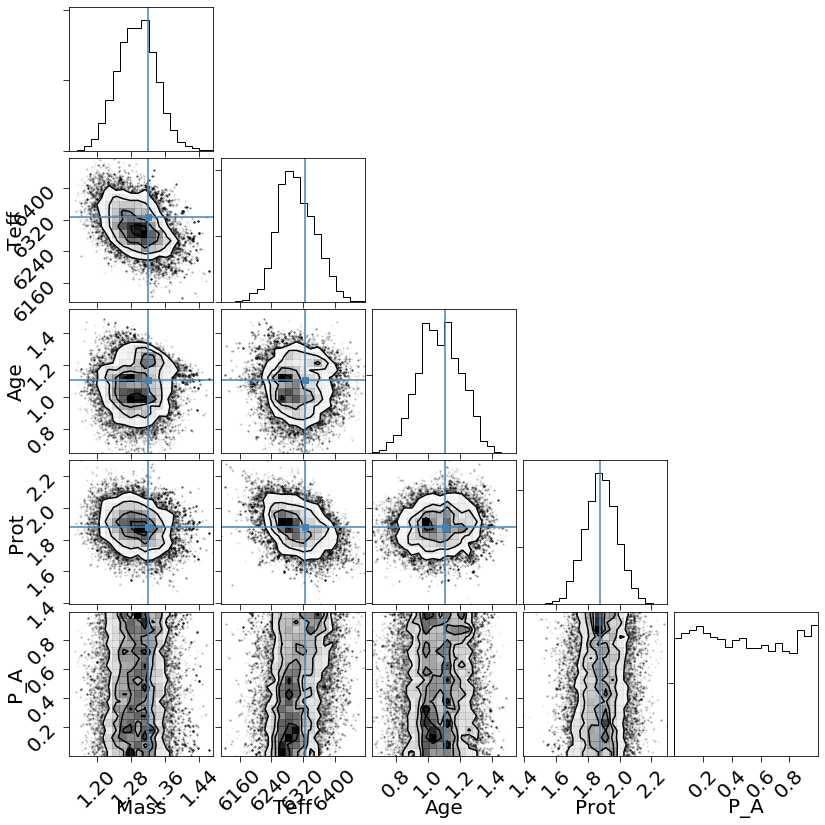

In [10]:
%%time
mix.run_one_star(stars[0])

CPU times: user 5min, sys: 476 ms, total: 5min
Wall time: 5min


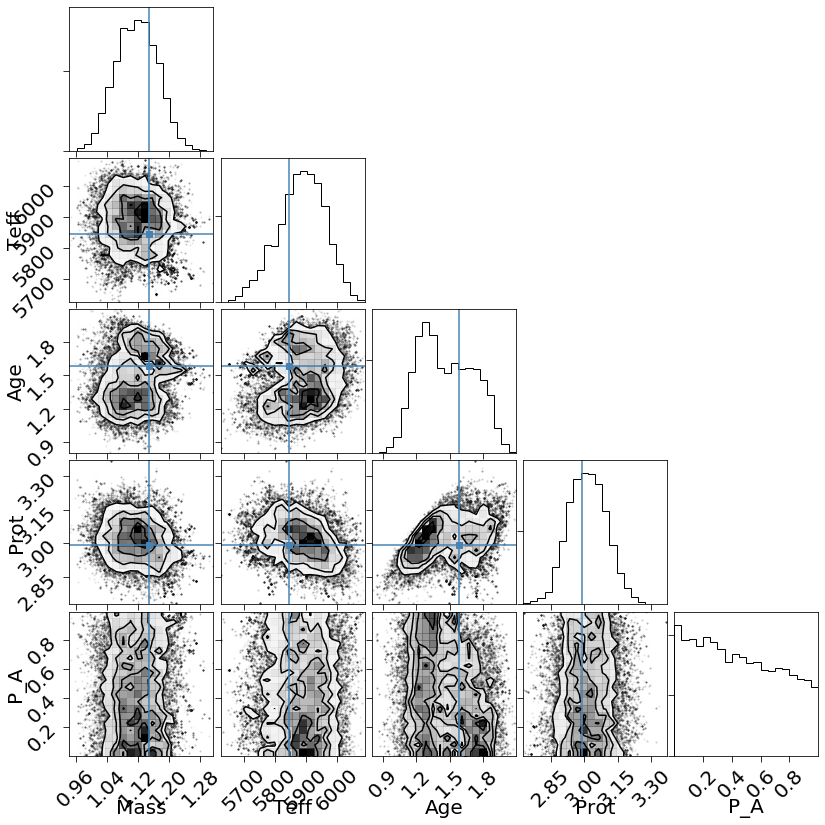

In [12]:
%%time
mix.run_one_star(stars[8])

CPU times: user 5min 41s, sys: 1.08 s, total: 5min 42s
Wall time: 5min 42s


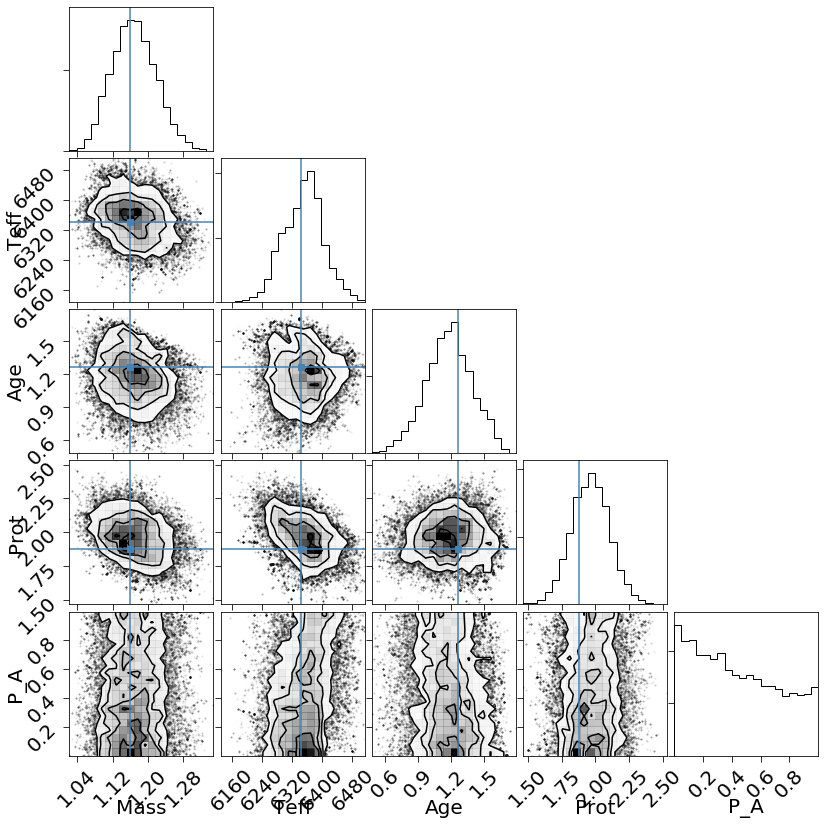

In [11]:
%%time
mix.run_one_star(stars[30])